#Theoretical

1. What is a Decision Tree, and how does it work?

A Decision Tree is a supervised machine learning algorithm used for classification and regression.

*  It works by splitting the dataset into subsets based on feature values.
*  Each internal node represents a feature test, branches represent outcomes, and leaf nodes represent predictions.
*  The splitting is done using measures like Gini Impurity or Entropy.

2. What are impurity measures in Decision Trees?

Impurity measures quantify the homogeneity of a node:
*  If all samples belong to one class → impurity = 0.
*  If classes are mixed → higher impurity.

Common impurity measures:
1. Gini Impurity
2. Entropy / Information Gain
3. Classification Error

3. What is the mathematical formula for Gini Impurity?

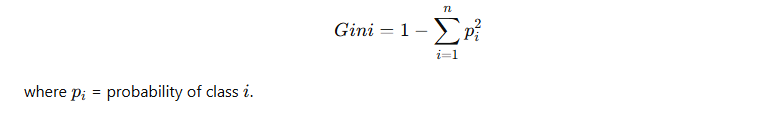

4. What is the mathematical formula for Entropy?

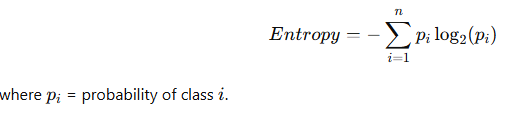

5. What is Information Gain, and how is it used in Decision Trees?

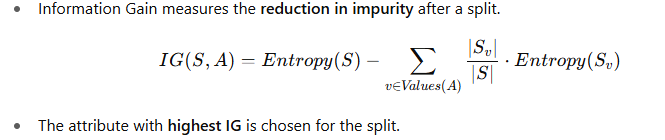

6. What is the difference between Gini Impurity and Entropy?

*  Gini: Faster to compute, works well in practice.
*  Entropy: Based on information theory, gives more weight to less frequent classes.

Both usually yield similar trees.

7. What is the mathematical explanation behind Decision Trees?

1. Start with root node (all data).
2. For each feature, calculate impurity reduction.
3. Choose feature with best split.
4. Repeat recursively until stopping condition (depth limit, pure node, min_samples).
5. Prediction = majority vote (classification) or average (regression).

8. What is Pre-Pruning in Decision Trees?

Stopping tree growth early using constraints like:
* Max depth
* Min samples per leaf
* Min impurity decrease

9. What is Post-Pruning in Decision Trees?

First grow full tree, then prune by removing nodes that do not improve validation accuracy (e.g., Cost Complexity Pruning).

10. What is the difference between Pre-Pruning and Post-Pruning?

* Pre-Pruning: Stops tree early. Faster but may underfit.
* Post-Pruning: Full tree → prune later. More accurate but costly.

11. What is a Decision Tree Regressor?

A Decision Tree for continuous values. Splits based on variance reduction instead of class impurity.

12.  What are the advantages and disadvantages of Decision Trees?

**Advantages:**

Easy to interpret

Handles categorical & numerical data

No feature scaling required

**Disadvantages:**

Prone to overfitting

Sensitive to small data changes

Greedy algorithm may not find global optimum

13. How does a Decision Tree handle missing values?

Some implementations (like C4.5) use surrogate splits.

In scikit-learn, missing values must be imputed before training.

14.  How does a Decision Tree handle categorical features?

Can split based on categories (e.g., “color = red/blue/green”).

In scikit-learn, categorical features must be encoded (One-Hot or Ordinal).

15. What are some real-world applications of Decision Trees?

* Medical diagnosis
* Loan approval / credit risk
* Fraud detection
* Customer churn prediction
* Marketing segmentation
* Predicting housing prices

#Practical

16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))




Model Accuracy: 1.0


17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the
feature importances.

In [ ]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)

print("Feature Importances (Gini):", clf_gini.feature_importances_)


Feature Importances (Gini): [0.         0.01911002 0.89326355 0.08762643]


18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the
model accuracy.

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))


Accuracy (Entropy): 0.9777777777777777


19.  Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean
Squared Error (MSE).

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
Xh, yh = housing.data, housing.target

Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.3, random_state=42)

reg = DecisionTreeRegressor(random_state=42)
reg.fit(Xh_train, yh_train)

yh_pred = reg.predict(Xh_test)
print("Mean Squared Error:", mean_squared_error(yh_test, yh_pred))


Mean Squared Error: 0.5280096503174904


20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as decision_tree.pdf



'decision_tree.pdf'

21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its
accuracy with a fully grown tree.

In [ ]:
clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_depth3.fit(X_train, y_train)

print("Accuracy (max_depth=3):", accuracy_score(y_test, clf_depth3.predict(X_test)))
print("Accuracy (full tree):", accuracy_score(y_test, clf.predict(X_test)))


Accuracy (max_depth=3): 1.0
Accuracy (full tree): 1.0


22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its
accuracy with a default tree.

In [ ]:
clf_split5 = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_split5.fit(X_train, y_train)

print("Accuracy (min_samples_split=5):", accuracy_score(y_test, clf_split5.predict(X_test)))
print("Accuracy (default):", accuracy_score(y_test, clf.predict(X_test)))


Accuracy (min_samples_split=5): 1.0
Accuracy (default): 1.0


23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its
accuracy with unscaled data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_s, y_train_s)

print("Accuracy with scaling:", accuracy_score(y_test_s, clf_scaled.predict(X_test_s)))
print("Accuracy without scaling:", accuracy_score(y_test, clf.predict(X_test)))


Accuracy with scaling: 1.0
Accuracy without scaling: 1.0


24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass
classification.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_clf.fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, ovr_clf.predict(X_test)))


OvR Accuracy: 1.0


25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores.

In [ ]:
print("Feature Importances:", clf.feature_importances_)


Feature Importances: [0.         0.01911002 0.89326355 0.08762643]


26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance
with an unrestricted tree.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Regressor with depth=5
reg_depth5 = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_depth5.fit(Xh_train, yh_train)

# Predictions
yh_pred_depth5 = reg_depth5.predict(Xh_test)
yh_pred_unrestricted = reg.predict(Xh_test)

# Print MSE
print("MSE (max_depth=5):", mean_squared_error(yh_test, yh_pred_depth5))
print("MSE (unrestricted):", mean_squared_error(yh_test, yh_pred_unrestricted))



MSE (max_depth=5): 0.5210801561811793
MSE (unrestricted): 0.5280096503174904


27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and
visualize its effect on accuracy.

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

for alpha in ccp_alphas[:5]:  # Try first 5 alphas
    clf_ccp = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf_ccp.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf_ccp.predict(X_test))
    print(f"Alpha={alpha:.5f}, Accuracy={acc:.4f}")


Alpha=0.00000, Accuracy=1.0000
Alpha=0.00924, Accuracy=1.0000
Alpha=0.01270, Accuracy=1.0000
Alpha=0.01270, Accuracy=1.0000
Alpha=0.01847, Accuracy=1.0000


28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision,
Recall, and F1-Score.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_class = clf.predict(X_test)

print("Precision:", precision_score(y_test, y_pred_class, average='macro'))
print("Recall:", recall_score(y_test, y_pred_class, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_class, average='macro'))


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.

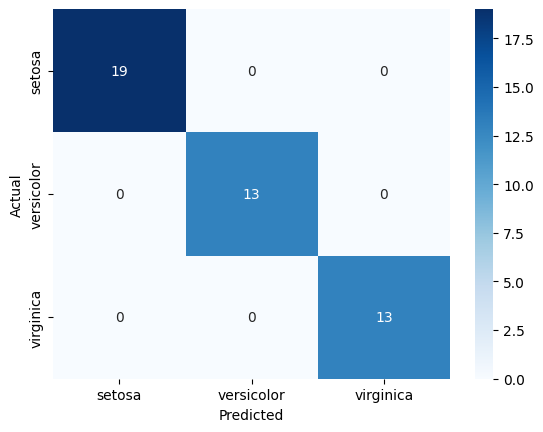

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)

sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values
for max_depth and min_samples_split.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': 4, 'min_samples_split': 10}
Best Accuracy: 0.9428571428571428
